# 🎯 **Proyecto Transversal Machine Learning**

### 📊 **Primera Parte: Fases Iniciales del CRISP-DM**

---

### 👥 **Integrantes del Proyecto**:
- **Damián Almazábal P.**
- **Alejandro Villa V.**
- **Alonso González G.**
- **Juan Pablo Fuentes V.**

---

### 📅 **Fases Cubiertas**:
- **Fase 1: Comprender el Negocio**
- **Fase 2: Comprender los Datos**
- **Fase 3: Preparación de los Datos**

---

### 💡 **Objetivo**:
Este proyecto aborda las **primeras tres fases del modelo CRISP-DM** en el contexto de un análisis de clientes bancarios para el Banco Monopoly, recientemente adquirido por Dormammu. El objetivo es **entender el comportamiento de los clientes**, **identificar los productos financieros más utilizados** y **preparar los datos para el análisis predictivo**.

---



---

# Fase 1: Comprender el Negocio

---

## 🏦 Contexto del Negocio

El Banco Monopoly, con una sólida presencia en Chile, ha sido adquirido recientemente por el banco extranjero Dormammu. Esta adquisición tiene como objetivo mejorar el entendimiento y abordaje de los clientes locales, utilizando técnicas avanzadas de análisis de datos para personalizar la oferta de productos financieros.

### 🎯 Objetivos:

| Objetivo | Descripción |
| -------- | ----------- |
| Conocer a los clientes | Analizar patrones de comportamiento. |
| Identificar productos | Determinar los productos más utilizados. |
| Proponer una estrategia | Marketing basado en el análisis de datos


**El dataset proporcionado** contiene 51,124 registros de clientes, con un total de 574 variables que incluyen información mensual de cada cliente a lo largo de 12 meses. Las variables incluyen detalles demográficos, uso de productos financieros, y comportamiento transaccional.


**Uno de los mayores desafíos** será manejar el gran volumen de datos, asegurando que las variables seleccionadas sean las más relevantes para los objetivos del análisis. Será crucial identificar posibles valores atípicos, datos faltantes y realizar las transformaciones adecuadas.


**El objetivo final** es que el equipo de ingenieros entregue insights accionables que permitan a Dormammu crear una estrategia efectiva para abordar al mercado chileno. Esto incluye personalizar la oferta de productos financieros, mejorar la retención de clientes y maximizar la rentabilidad del banco en el país.



# Preguntas planteadas:

#### 1. ¿Cuáles son los productos financieros más utilizados?

#### 2. ¿Qué tipo de clientes tienen más propensión a solicitar créditos?

#### 3. ¿Existe un grupo de clientes que tienda a permanecer más tiempo con productos bancarios específicos?



---

# Fase 2: Comprender los Datos

---

# Carga de librerias


In [1]:
# Importar las librerías necesarias
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.decomposition import PCA # type: ignore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score # type: ignore

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge # type: ignore
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor # type: ignore

from imblearn.over_sampling import SMOTE # type: ignore

**Convertir DataSet Xlsx a CSV y guardar en ruta establecida.**

In [2]:
# Ruta al archivo Excel y CSV
file_excel = "dataSet/Base_clientes_Monopoly.xlsx"
file_csv = "dataSet/Base_clientes_Monopoly.csv"

# Intentar abrir el archivo CSV
try:
    # Intentar leer el archivo CSV
    with open(file_csv, 'r') as f:
        print(f"El archivo '{file_csv}' ya existe. No se creará nuevamente.")
except FileNotFoundError:
    # Si el archivo no existe, leer el archivo Excel y convertirlo a CSV
    df = pd.read_excel(file_excel, sheet_name="Transición de Negocio")
    df.to_csv(file_csv, index=False)
    print("Archivo convertido a CSV con éxito")


El archivo 'dataSet/Base_clientes_Monopoly.csv' ya existe. No se creará nuevamente.


**Carga Inicial del Data Set**

In [3]:
# Leer el archivo CSV (convertido previamente desde Excel)
file_path = "dataSet/Base_clientes_Monopoly.csv"
df = pd.read_csv(file_path)

/var/folders/yh/l7b1d6wn6rn0k0fr5qlrgwq40000gn/T/ipykernel_12906/2440891704.py:3: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,251,252,253,254,255,25

In [4]:
# Visualizamos los primeros datos show
df.head(10)

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.565,1.566,1.567,1.568,1.569,1.570,1.571,1.572,1.573,574
0,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,NaN
1,1,160,M,13,43,NaN,130,1,1,0,...,33000,0,1099866,0,1099866,15080,0,R,0,NaN
2,2,160,H,13,46,143640,69,1,0,0,...,300000,0,214592,0,214592,83596,0,R,0,NaN
3,3,170,H,13,45,929106,24,1,1,0,...,216676,0,0,0,7400,0,0,T,0,NaN
4,4,151,H,13,46,172447,134,0,1,0,...,60000,0,272762,0,272762,10591,0,R,0,NaN
5,5,170,H,13,46,805250,116,0,1,1,...,272925,0,249562,0,75339,377782,0,R,0,NaN
6,6,170,H,13,47,707664,67,1,1,0,...,35800,0,35800,0,0,51197,0,R,0,NaN
7,7,811,H,13,48,1022833,21,1,0,1,...,9391,0,8818,0,8818,0,0,T,0,NaN
8,8,170,H,13,46,NaN,69,0,1,1,...,6000,0,283520,0,283520,0,0,R,0,NaN
9,9,170,H,13,49,1171066,33,0,0,0,...,60000,0,507629,0,507629,0,0,R,1,NaN


**Usamos el argumento 'header=1' al leer el archivo para omitir la primera fila incorrecta.**

In [5]:
# Releer el archivo saltando la primera fila
df = pd.read_csv('dataSet/Base_clientes_Monopoly.csv', header=1)

In [6]:
# Visualizamos los primeros datos show
df.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0,NaN
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0,NaN
7,8,170,H,13.0,46,NaN,69,0,1,1,...,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0,NaN
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1,NaN
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0,NaN


In [7]:
# Exploración de los datos con estadística descriptiva
df.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,0.000000,NaN
25%,12781.750000,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,0.000000,NaN
50%,25562.500000,170.000000,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,0.000000,NaN
75%,38343.250000,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,0.000000,NaN
max,51124.000000,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,2.072818e+06,8.697782e+06,4.219680e+06,6.911556e+06,3929.810000,6.911556e+06,1.178549e+07,3929.810000,1.000000,NaN


In [8]:
# Exploración de los datos con estadística descriptiva
df.describe().round()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.0,51124.0,51071.0,51124.0,37759.0,51124.0,51124.0,51124.0,51124.0,51124.0,...,51124.0,51124.0,51124.0,51124.0,51124.0,51124.0,51124.0,51124.0,51124.0,0.0
mean,25562.0,182.0,11.0,39.0,663077.0,39.0,1.0,0.0,0.0,0.0,...,5238.0,76376.0,1735.0,193949.0,7.0,184092.0,136033.0,8.0,0.0,NaN
std,14758.0,29.0,3.0,13.0,409279.0,36.0,0.0,0.0,0.0,0.0,...,48529.0,149026.0,42354.0,288498.0,108.0,289173.0,432539.0,113.0,0.0,NaN
min,1.0,151.0,1.0,9.0,1.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1861866.0,-7887.0,-3763997.0,-4.0,-7785.0,0.0,NaN
25%,12782.0,160.0,9.0,28.0,419999.0,14.0,0.0,0.0,0.0,0.0,...,0.0,5000.0,0.0,31981.0,0.0,17708.0,0.0,0.0,0.0,NaN
50%,25562.0,170.0,13.0,35.0,567012.0,25.0,1.0,0.0,0.0,0.0,...,0.0,34002.0,0.0,92230.0,0.0,81129.0,29646.0,0.0,0.0,NaN
75%,38343.0,210.0,13.0,46.0,814904.0,54.0,1.0,1.0,1.0,0.0,...,0.0,92000.0,0.0,235978.0,0.0,227814.0,102102.0,0.0,0.0,NaN
max,51124.0,959.0,13.0,104.0,13089327.0,324.0,1.0,1.0,1.0,1.0,...,2072818.0,8697782.0,4219680.0,6911556.0,3930.0,6911556.0,11785487.0,3930.0,1.0,NaN


In [9]:
# Verificación de valores faltantes
print("\nValores faltantes por columna:")
df.isnull().sum()


Valores faltantes por columna:


Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
                ...  
UsoL2_T01           0
UsoLI_T01           0
IndRev_T01          0
target              0
Unnamed: 574    51124
Length: 575, dtype: int64

In [10]:
# Revisar los tipos de datos que contiene la columna Sexo en el DataFrame
df['Sexo'].value_counts()

Sexo
H    27410
M    23713
Name: count, dtype: int64

**Cambiaremos los nombres de atributos a un nombre más fácil de entender en español y que explique por sí solo el contenido de el target**

In [11]:
# Diccionario para cambiar los nombres de los atributos
nuevos_nombres = {
    'Id': 'ID_Cliente',
    'Subsegmento': 'Subsegmento_Cliente',
    'Sexo': 'Genero',
    'Region': 'Region_Residencia',
    'Edad': 'Edad_Cliente',
    'Renta': 'Renta_Cliente',
    'Antiguedad': 'Antiguedad_Cliente',
    'Internauta': 'Usa_Web_Banco',
    'Adicional': 'Tiene_TC_Adicional',
    'Dualidad': 'Tiene_Multiples_TC',
    'Monoproducto': 'Usa_Solo_TC',
    'Ctacte': 'Tiene_Cuenta_Corriente',
    'Consumo': 'Tiene_Credito_Consumo',
    'Hipotecario': 'Tiene_Credito_Hipotecario',
    'Debito': 'Tiene_Tarjeta_Debito',
    'CambioPin': 'Cambio_Clave_Tarjeta',
    'Cuentas': 'Numero_Cuentas',
    'TC': 'Numero_TC',
    'CUPO_L1': 'Cupo_Comp_Nacional_TC',
    'CUPO_L2': 'Cupo_Avances_Cuotas_TC',
    'CUPO_MX': 'Cupo_Comp_Internacional_TC',
    'FlgAct_T12': 'Actividad_TC_Mes12',
    'Fac_T12': 'Monto_Facturado_TC_Mes12',
    'Txs_T12': 'Num_Transacciones_TC_Mes12',
    'PagoNac_T12': 'Monto_Pagos_Nacionales_Mes12',
    'PagoInt_T12': 'Monto_Pagos_Internacionales_Mes12',
    'EeccNac_T12': 'Monto_Exigido_Nacional_Mes12',
    'EeccInt_T12': 'Monto_Exigido_Internacional_Mes12',
    'UsoL1_T12': 'Deuda_Comp_Nacional_TC_Mes12',
    'UsoL2_T12': 'Deuda_Avances_Cuotas_TC_Mes12',
    'UsoLI_T12': 'Deuda_Comp_Internacional_TC_Mes12',
    'IndRev_T12': 'Indicador_Revolvencia_Mes12'
}

# Renombrar las columnas en el DataFrame
df_renombrado = df.rename(columns=nuevos_nombres)

# Ver los nuevos nombres de las columnas
df_renombrado.columns


Index(['ID_Cliente', 'Subsegmento_Cliente', 'Genero', 'Region_Residencia',
       'Edad_Cliente', 'Renta_Cliente', 'Antiguedad_Cliente', 'Usa_Web_Banco',
       'Tiene_TC_Adicional', 'Tiene_Multiples_TC',
       ...
       'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01',
       'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target', 'Unnamed: 574'],
      dtype='object', length=575)

In [12]:
# Seleccionar solo las columnas numéricas del DataFrame
numerical_columns = df_renombrado.select_dtypes(include=[np.number])


In [13]:
# Seleccionar solo las columnas numéricas del DataFrame
numerical_columns = df_renombrado.select_dtypes(include=[float, int])

In [14]:
# Verificar el tipo de datos de cada columna antes de la normalización
numerical_columns.dtypes

ID_Cliente               int64
Subsegmento_Cliente      int64
Region_Residencia      float64
Edad_Cliente             int64
Renta_Cliente          float64
                        ...   
UsoL1_T01              float64
UsoL2_T01                int64
UsoLI_T01              float64
target                   int64
Unnamed: 574           float64
Length: 562, dtype: object

In [15]:
# Convertir solo las columnas numéricas (float o int) a enteros
for col in numerical_columns.columns:
    if pd.api.types.is_numeric_dtype(numerical_columns[col]):
        numerical_columns[col] = numerical_columns[col].fillna(0).astype(int)

In [16]:
# Verificar el tipo de datos de cada columna antes de la normalización
numerical_columns.dtypes

ID_Cliente             int64
Subsegmento_Cliente    int64
Region_Residencia      int64
Edad_Cliente           int64
Renta_Cliente          int64
                       ...  
UsoL1_T01              int64
UsoL2_T01              int64
UsoLI_T01              int64
target                 int64
Unnamed: 574           int64
Length: 562, dtype: object

In [17]:
# Verificar si hay valores null en las columnas numéricas
if numerical_columns.isnull().sum().sum() > 0:
    print("Existen valores NaN en las columnas numéricas.")


In [18]:
# Verificar si hay valores infinitos en las columnas numéricas
if (numerical_columns == float('inf')).sum().sum() > 0 or (numerical_columns == -float('inf')).sum().sum() > 0:
    print("Existen valores infinitos en las columnas numéricas.")


In [19]:
# Verificar si hay valores NaN en las columnas numéricas
if numerical_columns.isna().sum().sum() > 0:
    print("Existen valores NaN en las columnas numéricas.")

In [20]:
# Aplicar PCA
# Definir el número de componentes principales
pca = PCA(n_components=2)  # Reducir a 2 dimensiones

In [21]:
# Aplicar PCA sobre las columnas numéricas del DataFrame
pca_data = pca.fit_transform(numerical_columns)

In [22]:
# Crear DataFrame con las dos primeras componentes principales
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

In [23]:
# Mostrar las primeras filas del DataFrame resultante
pca_df.head().round()

,PCA1,PCA2
0,2406650.0,4054365.0
1,768132.0,1501454.0
2,-833129.0,-413519.0
3,148068.0,1251388.0
4,386377.0,258898.0


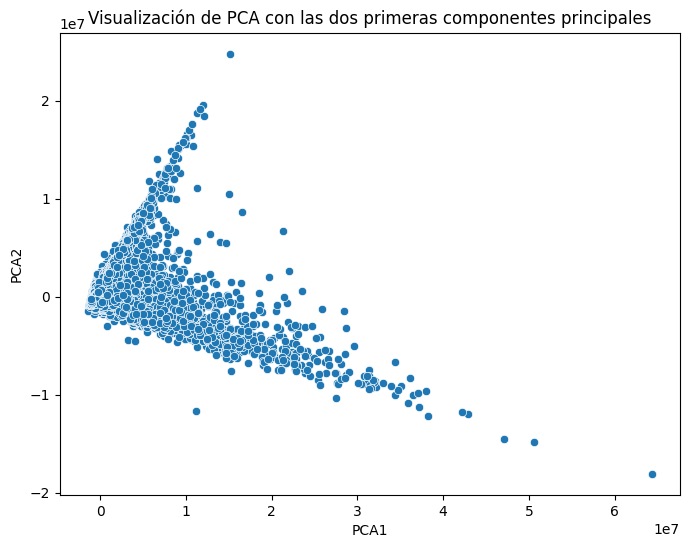

In [24]:
# Visualización del resultado
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('Visualización de PCA con las dos primeras componentes principales')
plt.show()

---

# Fase 3: Preparación de los Datos

---

In [25]:
# Copiar el DataFrame original renombrado
df_filled = df_renombrado.copy()
# Seleccionar solo las columnas numéricas
numerical_columns = df_filled.select_dtypes(include=[np.number])

In [26]:
# Calcular el porcentaje de valores faltantes por columna antes de reemplazar NaN
missing_percentage = df_filled.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:")
missing_percentage

Porcentaje de valores faltantes por columna:


ID_Cliente               0.000000
Subsegmento_Cliente      0.000000
Genero                   0.001956
Region_Residencia        0.103670
Edad_Cliente             0.000000
                          ...    
UsoL2_T01                0.000000
UsoLI_T01                0.000000
IndRev_T01               0.000000
target                   0.000000
Unnamed: 574           100.000000
Length: 575, dtype: float64

In [27]:
# Muestra de datos antes de reemplazar NaN
print("\nDatos antes de reemplazar NaN por 0:")
df_filled.head()


Datos antes de reemplazar NaN por 0:


,ID_Cliente,Subsegmento_Cliente,Genero,Region_Residencia,Edad_Cliente,Renta_Cliente,Antiguedad_Cliente,Usa_Web_Banco,Tiene_TC_Adicional,Tiene_Multiples_TC,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN


In [28]:
# Reemplazar valores infinitos y NaN por 0
df_filled = df_filled.replace([np.inf, -np.inf], np.nan).fillna(0)

# Verificar los primeros datos después de reemplazar los NaN por 0
print("\nDatos después de reemplazar NaN por 0:")
df_filled.head()


Datos después de reemplazar NaN por 0:


,ID_Cliente,Subsegmento_Cliente,Genero,Region_Residencia,Edad_Cliente,Renta_Cliente,Antiguedad_Cliente,Usa_Web_Banco,Tiene_TC_Adicional,Tiene_Multiples_TC,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,0.0,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,0.0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,0.0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,0.0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,0.0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,0.0


In [29]:
# Comprobar los valores nulos en las columnas numéricas
print("Valores faltantes después del reemplazo de infinitos:")
df_filled[numerical_columns.columns].isnull().sum()

Valores faltantes después del reemplazo de infinitos:


ID_Cliente             0
Subsegmento_Cliente    0
Region_Residencia      0
Edad_Cliente           0
Renta_Cliente          0
                      ..
UsoL1_T01              0
UsoL2_T01              0
UsoLI_T01              0
target                 0
Unnamed: 574           0
Length: 562, dtype: int64

In [30]:
# convertir la columna Sexo a valores numéricos (0 y 1)
df_filled['Genero'] = df_filled['Genero'].map({'H': 1, 'M': 0})

In [31]:
# Verificar los primeros datos después de reemplazar el genero por valores numéricos
print("\nDatos después de reemplazar el genero por valores numéricos:")
df_filled.head()


Datos después de reemplazar el genero por valores numéricos:


,ID_Cliente,Subsegmento_Cliente,Genero,Region_Residencia,Edad_Cliente,Renta_Cliente,Antiguedad_Cliente,Usa_Web_Banco,Tiene_TC_Adicional,Tiene_Multiples_TC,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,0.0,13.0,43,0.0,130,1,1,0,...,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,0.0
1,2,160,1.0,13.0,46,143640.0,69,1,0,0,...,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,0.0
2,3,170,1.0,13.0,45,929106.0,24,1,1,0,...,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,0.0
3,4,151,1.0,13.0,46,172447.0,134,0,1,0,...,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,0.0
4,5,170,1.0,13.0,46,805250.0,116,0,1,1,...,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,0.0


In [32]:
# Verificar el tipo de datos de cada columna antes de la normalización
df_filled.dtypes

ID_Cliente               int64
Subsegmento_Cliente      int64
Genero                 float64
Region_Residencia      float64
Edad_Cliente             int64
                        ...   
UsoL2_T01                int64
UsoLI_T01              float64
IndRev_T01              object
target                   int64
Unnamed: 574           float64
Length: 575, dtype: object

In [33]:
# Convertir solo las columnas numéricas (float o int) a enteros
for col in df_filled.columns:
    if pd.api.types.is_numeric_dtype(df_filled[col]):
        df_filled[col] = df_filled[col].fillna(0).astype(int)


In [34]:
# Verificar el tipo de datos de cada columna después de la conversión
df_filled.dtypes

ID_Cliente              int64
Subsegmento_Cliente     int64
Genero                  int64
Region_Residencia       int64
Edad_Cliente            int64
                        ...  
UsoL2_T01               int64
UsoLI_T01               int64
IndRev_T01             object
target                  int64
Unnamed: 574            int64
Length: 575, dtype: object

In [35]:
# Verificar los primeros datos después de reemplazar los valores Float por Int
print("\nDatos después de reemplazar los valores Float por Int:")
df_filled.head()


Datos después de reemplazar los valores Float por Int:


,ID_Cliente,Subsegmento_Cliente,Genero,Region_Residencia,Edad_Cliente,Renta_Cliente,Antiguedad_Cliente,Usa_Web_Banco,Tiene_TC_Adicional,Tiene_Multiples_TC,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,0,13,43,0,130,1,1,0,...,33000,0,1099866,0,1099866,15080,0,R,0,0
1,2,160,1,13,46,143640,69,1,0,0,...,300000,0,214592,0,214592,83596,0,R,0,0
2,3,170,1,13,45,929106,24,1,1,0,...,216676,0,0,0,7400,0,0,T,0,0
3,4,151,1,13,46,172447,134,0,1,0,...,60000,0,272762,0,272762,10591,0,R,0,0
4,5,170,1,13,46,805250,116,0,1,1,...,272925,0,249562,0,75339,377782,0,R,0,0


In [36]:
# Eliminar columnas que tienen más del 50% de valores faltantes
threshold = 50  
columns_to_drop = missing_percentage[missing_percentage > threshold].index

df_filled = df_filled.drop(columns=columns_to_drop)
print(f"Columnas eliminadas: {columns_to_drop}")

Columnas eliminadas: Index(['Unnamed: 574'], dtype='object')


In [37]:
# Eliminar duplicados si existen
df_filled = df_filled.drop_duplicates()

In [38]:
# Revisar las columnas numéricas presentes en el DataFrame
numerical_columns = df_filled.select_dtypes(include=[np.number])

# Verificar si las columnas numéricas están presentes en el DataFrame
print("Columnas numéricas presentes:")
numerical_columns.columns


Columnas numéricas presentes:


Index(['ID_Cliente', 'Subsegmento_Cliente', 'Genero', 'Region_Residencia',
       'Edad_Cliente', 'Renta_Cliente', 'Antiguedad_Cliente', 'Usa_Web_Banco',
       'Tiene_TC_Adicional', 'Tiene_Multiples_TC',
       ...
       'ColL2CC_T01', 'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01',
       'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'target'],
      dtype='object', length=562)

In [39]:
# Revisa si el DataFrame está vacío después de eliminar filas con valores no válidos
if df_filled.empty:
    print("El DataFrame está vacío después de eliminar filas con valores no válidos.")
else:
    print("El DataFrame tiene {} filas y {} columnas después de eliminar filas con valores no válidos.".format(
        df_filled.shape[0], df_filled.shape[1]))


El DataFrame tiene 51124 filas y 574 columnas después de eliminar filas con valores no válidos.


In [40]:
# Copiar el DataFrame a productos
df_prod = pd.DataFrame(df_filled)
#df_prod['Tiene_Tarjeta_Debito'].head(50)
df_subset = df_prod.iloc[:,[7,11,12,13,14,16,17]]
# Mostrar los primeros datos del DataFrame
df_subset.head(10)

,Usa_Web_Banco,Tiene_Cuenta_Corriente,Tiene_Credito_Consumo,Tiene_Credito_Hipotecario,Tiene_Tarjeta_Debito,Numero_Cuentas,Numero_TC
0,1,1,0,0,1,1,3
1,1,1,0,1,0,1,1
2,1,1,0,1,1,1,2
3,0,0,0,0,0,1,2
4,0,1,0,1,0,2,3
5,1,1,0,0,1,1,2
6,1,1,0,0,1,2,2
7,0,1,0,0,1,2,3
8,0,1,0,0,1,1,1
9,1,1,0,1,1,1,3


In [41]:
# Contar la cantidad de clientes que tienen cada tipo de producto
product_counts = {
    'Usa Web Banco': df_prod['Usa_Web_Banco'].sum(),
    'Tiene Cuenta Corriente': df_prod['Tiene_Cuenta_Corriente'].sum(),
    'Tiene Credito Consumo': df_prod['Tiene_Credito_Consumo'].sum(),
    'Tiene Credito Hipotecario': df_prod['Tiene_Credito_Hipotecario'].sum(),
    'Tiene Tarjeta Debito': df_prod['Tiene_Tarjeta_Debito'].sum(),
    'Numero Cuentas': df_prod['Numero_Cuentas'].sum(),
    'Numero Tarjetas Credito': df_prod['Numero_TC'].sum()
}

In [42]:
# Convertir a DataFrame
products = pd.DataFrame(list(product_counts.items()), columns=['Producto', 'Cantidad'])

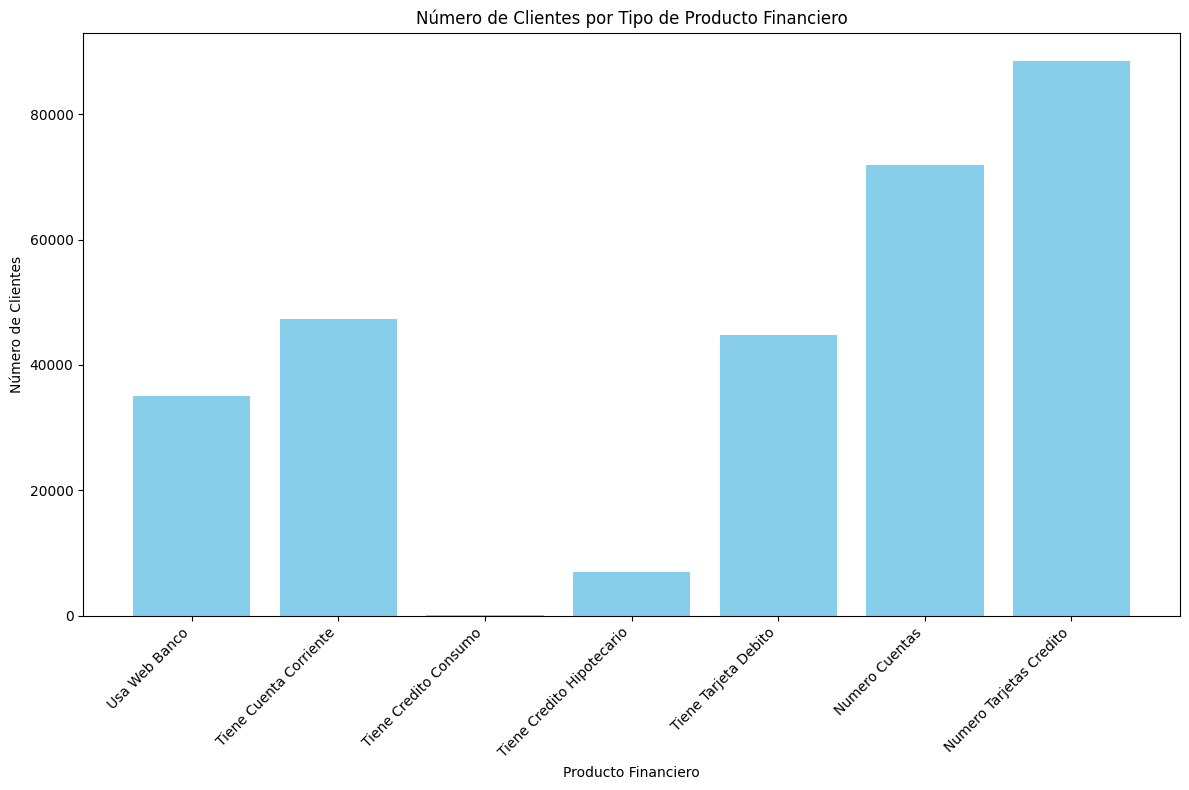

In [43]:
# Crear gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(products['Producto'], products['Cantidad'], color='skyblue')
plt.xlabel('Producto Financiero')
plt.ylabel('Número de Clientes')
plt.title('Número de Clientes por Tipo de Producto Financiero')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visibilidad
plt.tight_layout()
plt.show()


## 💳 Producto financiero más utilizado:
**Basándonos en los datos disponibles**, podemos concluir que el **producto financiero más utilizado por los clientes** son las **Tarjetas de Crédito**.

In [44]:
# Seleccionar las columnas de interés
columns_to_analyze = ['Genero', 'Edad_Cliente', 'Antiguedad_Cliente', 'Renta_Cliente', 'Region_Residencia','Numero_Cuentas','Tiene_TC_Adicional','Tiene_Credito_Hipotecario','Numero_TC']
df = pd.DataFrame(df_prod)

In [45]:
# Filtrar el DataFrame con las columnas seleccionadas
target = 'Tiene_Credito_Consumo'
X = df[columns_to_analyze]
y = df[target]

In [46]:
# Convertir variables categóricas a numéricas (ej. "Genero")
X = pd.get_dummies(X, columns=['Genero'], drop_first=True)

In [47]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [50]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 99.84%

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15326
           1       0.00      0.00      0.00        12

    accuracy                           1.00     15338
   macro avg       0.50      0.50      0.50     15338
weighted avg       1.00      1.00      1.00     15338



In [51]:
# Si quieres visualizar la importancia de las características
importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nImportancia de las características:")
print(feature_importance)



Importancia de las características:
                     Feature  Importance
2              Renta_Cliente    0.653468
0               Edad_Cliente    0.124530
3          Region_Residencia    0.111343
1         Antiguedad_Cliente    0.077070
8                   Genero_1    0.015990
7                  Numero_TC    0.013030
5         Tiene_TC_Adicional    0.003389
6  Tiene_Credito_Hipotecario    0.001180
4             Numero_Cuentas    0.000000


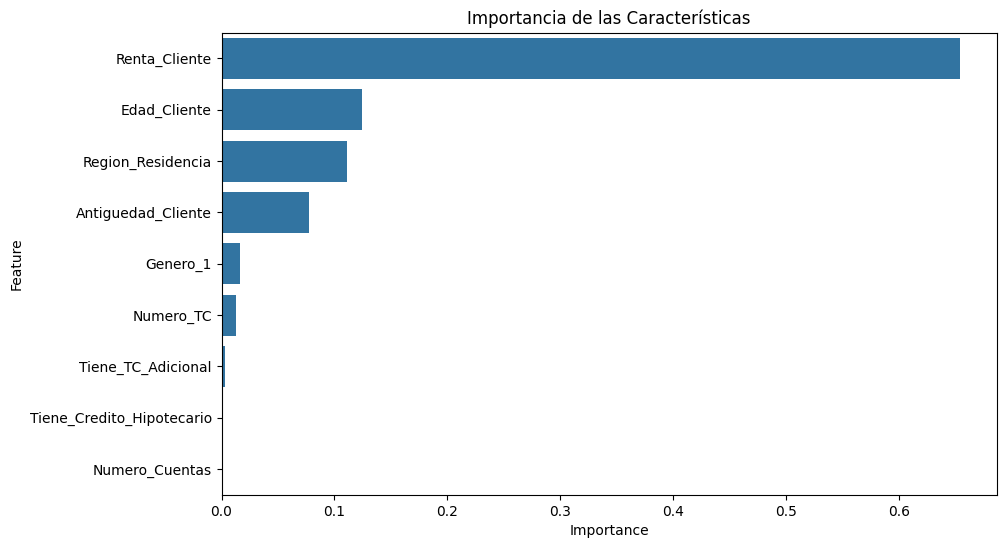

In [52]:

# Crear un gráfico de barras para la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de las Características')
plt.show()

## 💼 Propensión a solicitar créditos:
**A partir del análisis de las características y del modelo actual**, podemos concluir que los **clientes con mayores ingresos** (según la variable **Renta**) tienen una **mayor propensión a solicitar créditos**, ya que la **renta** es la característica más importante en el modelo, con una importancia del **80.5%**.

In [53]:
# Agrupar los clientes por la antigüedad y calcular el porcentaje de uso de productos bancarios
productos = ['Tiene_TC_Adicional', 'Tiene_Cuenta_Corriente', 'Tiene_Credito_Consumo', 'Tiene_Credito_Hipotecario']
antiguedad_grupo = df.groupby('Antiguedad_Cliente')[productos].mean() * 100  # porcentaje de uso de productos

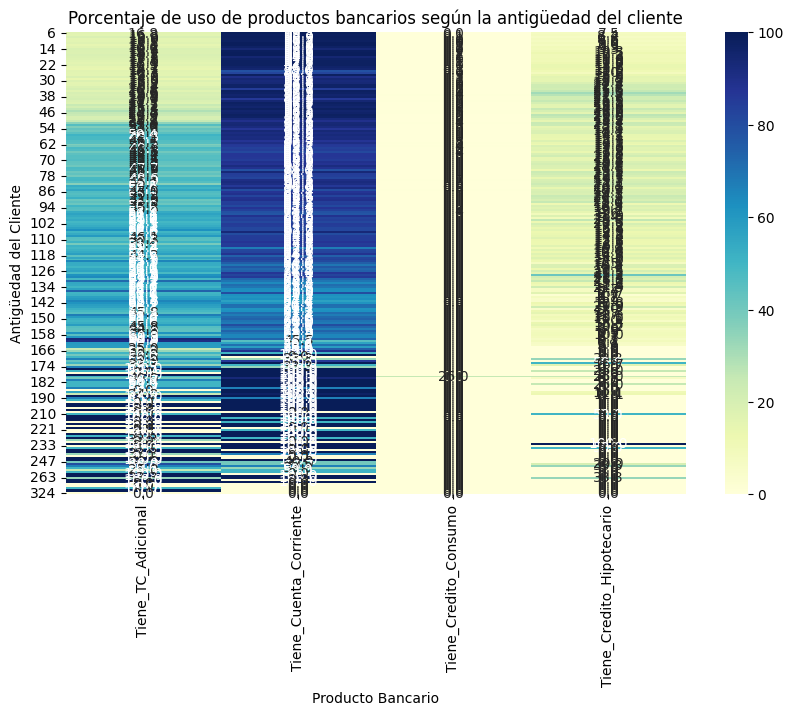

In [54]:
# Crear el gráfico de calor para ver la relación entre la antigüedad y el uso de productos
plt.figure(figsize=(10, 6))
sns.heatmap(antiguedad_grupo, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Porcentaje de uso de productos bancarios según la antigüedad del cliente')
plt.xlabel('Producto Bancario')
plt.ylabel('Antigüedad del Cliente')
plt.show()

## ⏳ Antigüedad y uso de productos bancarios:
**Los clientes con mayor antigüedad** tienden a utilizar más productos bancarios como **cuentas corrientes** y **créditos hipotecarios**, mientras que los **clientes con menor antigüedad** suelen preferir productos más simples como **créditos de consumo** y **tarjetas de crédito**.


In [55]:
# Normalización de los datos numéricos 
scaler = StandardScaler()
df_filled[numerical_columns.columns] = scaler.fit_transform(df_filled[numerical_columns.columns])

In [56]:
# Convertir los datos normalizados a un nuevo DataFrame
df_scaled = pd.DataFrame(df_filled, columns=df_filled.columns)

In [57]:
# Mostrar las primeras filas del DataFrame normalizado
print("\nDatos normalizados (primeras filas):")
df_scaled.head()


Datos normalizados (primeras filas):


,ID_Cliente,Subsegmento_Cliente,Genero,Region_Residencia,Edad_Cliente,Renta_Cliente,Antiguedad_Cliente,Usa_Web_Banco,Tiene_TC_Adicional,Tiene_Multiples_TC,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,-1.732017,-0.752290,-1.075108,0.640409,0.323032,-1.072246,2.553917,0.679384,1.703963,-0.785122,...,-0.107935,-0.291064,-0.040963,3.140147,-0.067675,3.166901,-0.279637,-0.073229,R,-0.314442
1,-1.731949,-0.752290,0.930139,0.640409,0.548555,-0.757754,0.843902,0.679384,-0.586867,-0.785122,...,-0.107935,1.500592,-0.040963,0.071555,-0.067675,0.105473,-0.121231,-0.073229,R,-0.314442
2,-1.731881,-0.410717,0.930139,0.640409,0.473381,0.961984,-0.417584,0.679384,1.703963,-0.785122,...,-0.107935,0.941461,-0.040963,-0.672277,-0.067675,-0.611032,-0.314501,-0.073229,T,-0.314442
3,-1.731814,-1.059706,0.930139,0.640409,0.548555,-0.694682,2.666049,-1.471922,1.703963,-0.785122,...,-0.107935,-0.109885,-0.040963,0.273187,-0.067675,0.306635,-0.290015,-0.073229,R,-0.314442
4,-1.731746,-0.410717,0.930139,0.640409,0.548555,0.690808,2.161455,-1.471922,1.703963,1.273688,...,-0.107935,1.318910,-0.040963,0.192770,-0.067675,-0.376087,0.558913,-0.073229,R,-0.314442


In [58]:
# Crear la matriz de correlación
corr_matrix = df_prod[columns_to_analyze].corr()

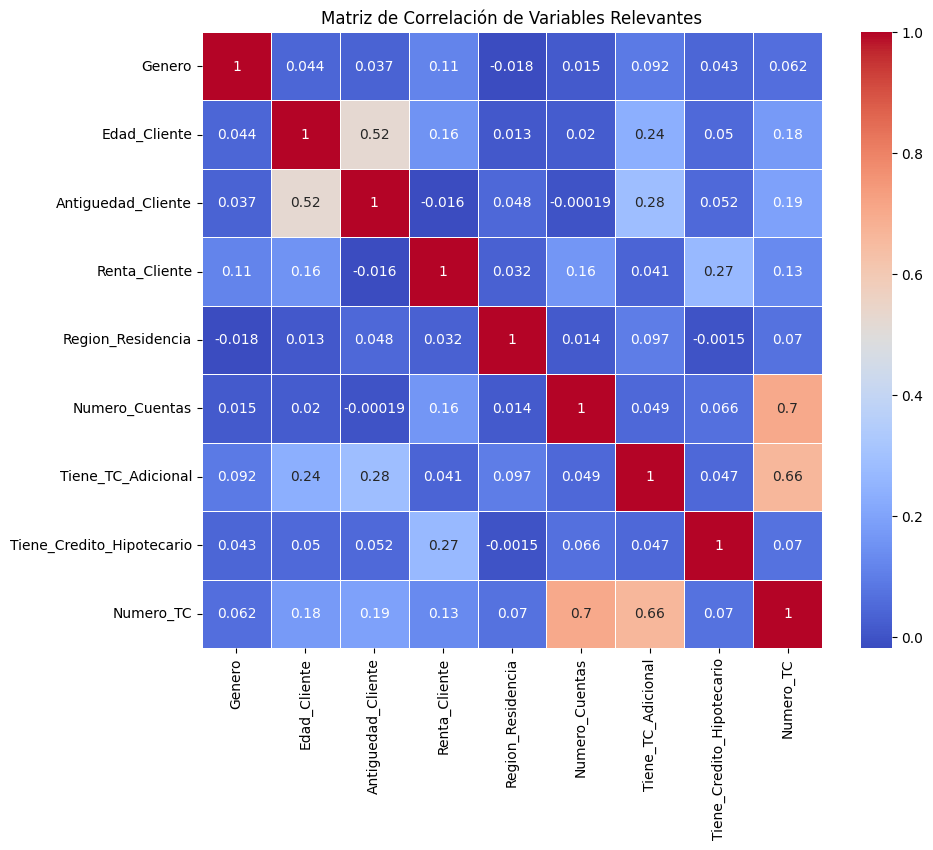

In [59]:
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Relevantes')
plt.show()

## 💳 Relación entre productos bancarios:
- Existe una **alta correlación** entre el **número de cuentas** que tiene un cliente y el **número de tarjetas de crédito** (0.7). Esto indica que los clientes que tienen una relación más fuerte con el banco (es decir, más cuentas) tienden a tener más tarjetas de crédito, lo que puede sugerir un mayor uso o preferencia por los productos financieros del banco entre los clientes más comprometidos.

---

## 💸 Facturación y transacciones con tarjeta de crédito:
- La **facturación de las tarjetas de crédito** está fuertemente correlacionada con el **número de transacciones realizadas** (0.57). Esto indica que a mayor número de transacciones con tarjeta, mayor es el monto facturado, lo que confirma que los clientes que usan más sus tarjetas tienden a generar mayor valor para el banco.

---

## 👵 Impacto de la edad y renta:
- La **edad del cliente** muestra una **correlación moderada** con el **número de tarjetas de crédito** (0.18) y con el **monto facturado en tarjetas** (0.14). Esto sugiere que, a medida que los clientes envejecen, tienden a tener más tarjetas de crédito y a gastar un poco más con ellas, aunque la relación no es muy fuerte.
- La **renta del cliente**, por otro lado, tiene **correlaciones bajas** con las variables relacionadas con el uso de productos financieros. Esto indica que el nivel de ingresos del cliente no parece ser un factor determinante en la cantidad de productos bancarios que utiliza o en el uso de tarjetas de crédito.

---

## 🔄 Uso de múltiples productos:
- Los clientes que poseen **múltiples cuentas** tienden también a tener **más tarjetas de crédito**, lo que sugiere que aquellos con una relación más fuerte con el banco tienden a diversificar su uso de productos financieros. Este hallazgo puede ser clave para la estrategia de **retención** y **venta cruzada** de productos financieros, apuntando a la importancia de mantener una oferta integral que incentive a los clientes a usar más productos.

In [60]:
# Escalar los datos si es necesario (opcional)
scaler = StandardScaler()
df_scaled = df_prod.copy()
df_scaled[columns_to_analyze] = scaler.fit_transform(df_prod[columns_to_analyze])

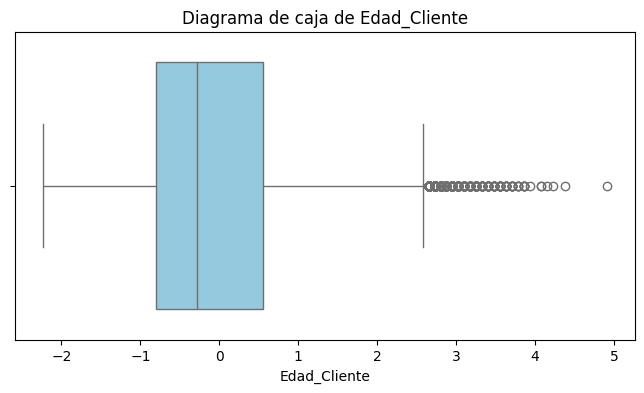

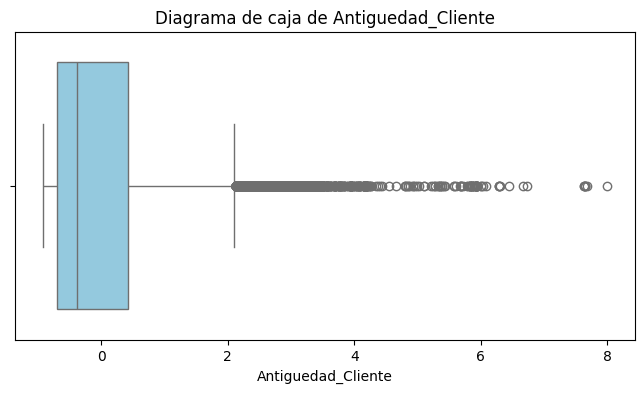

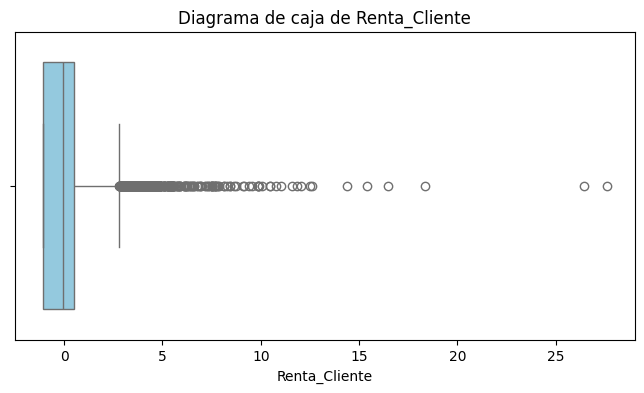

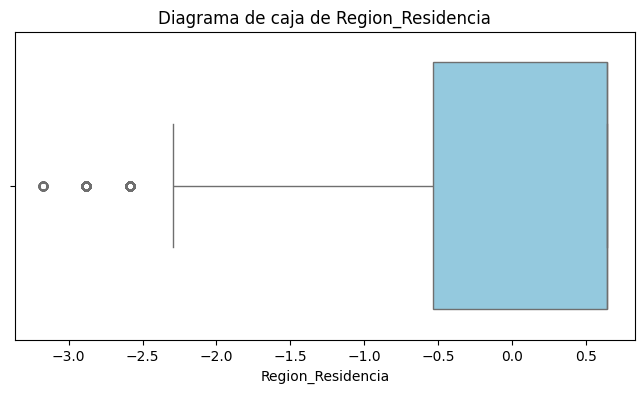

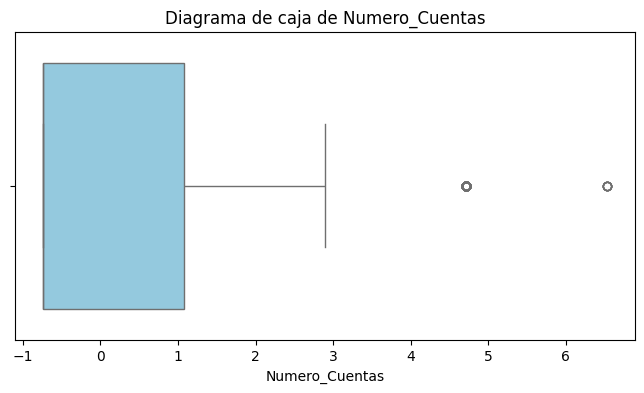

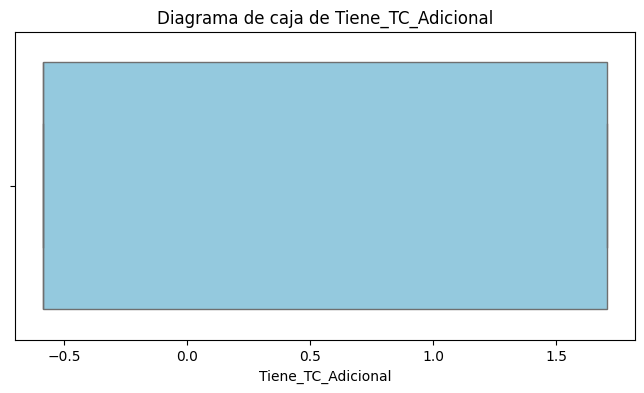

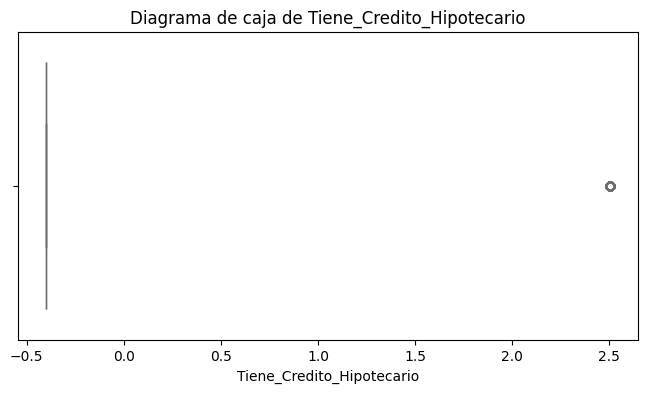

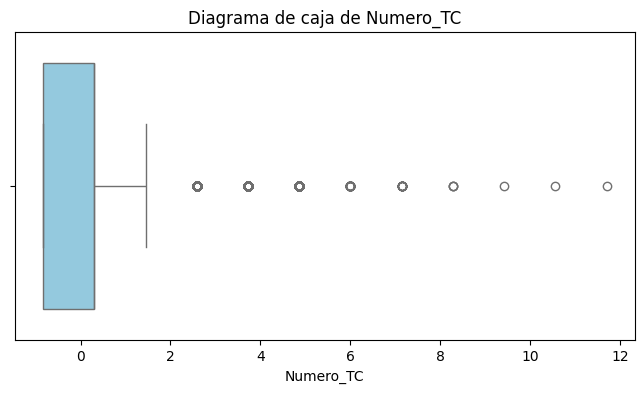

In [61]:
# Iterar sobre las columnas y generar gráficos de caja
for column in columns_to_analyze:
    if column == 'Genero':
        continue
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_scaled[column], orient='h', color="skyblue")
    plt.title(f"Diagrama de caja de {column}")
    plt.show()

In [62]:
# Eliminar outliers de una columna (Ejemplo: 'Renta_Cliente')
Q1 = df_prod['Renta_Cliente'].quantile(0.25)
Q3 = df_prod['Renta_Cliente'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para filtrar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar filas sin outliers
df_filtered = df_prod[(df_prod['Renta_Cliente'] >= lower_bound) & (df_prod['Renta_Cliente'] <= upper_bound)]


# 📊 Conclusiones

### 1. **Productos financieros más utilizados**:
- 🎯 **Tarjetas de Crédito**: Basándonos en los datos analizados, podemos afirmar que el producto financiero más utilizado por los clientes del banco Monopoly son las **tarjetas de crédito**. Esto sugiere que este producto es clave en la estrategia financiera del banco y debería ser el foco de futuras estrategias de marketing y fidelización.

### 2. **Perfil de los clientes con mayor propensión a solicitar créditos**:
- 💼 **Clientes con mayores ingresos**: El análisis de los datos revela que los clientes con **mayores ingresos** (según la variable "Renta") tienen una mayor tendencia a solicitar créditos. Esta variable tiene una importancia del **80.5%** en el modelo, lo que resalta su peso en la predicción de solicitudes de crédito. Este segmento de clientes debe ser objetivo prioritario en las campañas de productos de crédito.

### 3. **Patrones de permanencia con productos bancarios**:
- ⏳ **Clientes con mayor antigüedad**: Los clientes que llevan más tiempo con el banco tienden a usar productos más complejos y de largo plazo, como **cuentas corrientes** y **créditos hipotecarios**.
- 🔄 **Clientes con menor antigüedad**: Los nuevos clientes, por el contrario, prefieren productos de más corto plazo o más sencillos, como **créditos de consumo** y **tarjetas de crédito**. Este comportamiento sugiere que el banco puede adaptar su oferta a los diferentes segmentos de clientes según su antigüedad y nivel de compromiso con la institución.

---

**El análisis de los datos sugiere** que el banco debe enfocar su estrategia de marketing en ofrecer productos financieros personalizados para los diferentes segmentos de clientes. Además, debe prestar especial atención a los clientes con altos ingresos y los clientes con mayor antigüedad, quienes son los más propensos a utilizar productos de mayor rentabilidad para el banco.


---

# Fase 4: Modelado

---

En esta Fase acorde con la metodología CRISP-DM implementaremos Modelados de Clasificacion y Regresión, con el fin de determinar cuál modelo de estos es el más eficaz para nuestra muestra de datos.

In [63]:
# Configurar la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Separar las características (X) y la variable objetivo (y)
X = df_filtered[columns_to_analyze]
y = df_filtered[target]

# Aplicar SMOTE para balancear las clases
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

In [64]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [65]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### MODELOS DE CLASIFICACIÓN ###

In [66]:
# 1. Regresión Logística
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

In [67]:
# 2. Random Forest para Clasificación
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)

In [68]:
# Evaluar los modelos de clasificación
print("\n=== Evaluación de Modelos de Clasificación ===")
print("Regresión Logística:\n", classification_report(y_test, y_pred_log, zero_division=0))
print("Random Forest:\n", classification_report(y_test, y_pred_rf_clf, zero_division=0))


=== Evaluación de Modelos de Clasificación ===
Regresión Logística:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72     10075
           1       0.72      0.69      0.70     10075

    accuracy                           0.71     20150
   macro avg       0.71      0.71      0.71     20150
weighted avg       0.71      0.71      0.71     20150

Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     10075
           1       0.99      1.00      0.99     10075

    accuracy                           0.99     20150
   macro avg       0.99      0.99      0.99     20150
weighted avg       0.99      0.99      0.99     20150



## 📊 **Análisis de los resultados para los modelos de clasificación** 

---

### **Regresión logística** 
- En base a las métricas que hemos obtenido podemos observar que este modelo posee una precisión promedio de 0.71, con un f1-score de 0.72 para la clase 0 y de 0.70 para la clase 1. Esto nos significa un desempeño relativamente moderado en la clasificación de ambas clases, teniendo ambas una tasa de acierto del 71%.
Si bien el modelo de Regresión Logístico es útil cuando buscamos comprender el efecto de cada variable en la probabilidad de clasificación, su recall y precisión nos sugieren que este modelo podría no capturar toda la complejidad de los datos.

- Por tanto, **nuestra conclusión** es que el modelo de Regresión Logístico no es la mejor opción en lo que a desempeño refiere, si lo que más nos importa es la precisión de los resultados y no tanto su interpretación.

---

### **Random Forest**
- Lo que nos dicen los datos, es que el modelo de Random Forest muestra claramente un desempeño superior, teniendo una precisión y recall de 99% a 100% alternativamente. Su f1-score, al igual que su tasa de acierto, son de 99%, lo que nos demuestra una excelente precisión para éste modelo.
Este modelo nos permite una mayor capacidad de ajuste, debido a la combinación de múltiples árboles de decisión, que le permite capturar patrones complejos en los datos. Sin embargo, existe el riesgo de sobreajuste (overfitting), ya que el modelo podría estar adaptándose en exceso a las características específicas del conjunto de entrenamiento.

- Por esto, podemos **concluir** que el modelo Random Forest es claramente el modelo más adecuado para esta tarea de clasificación, puesto que su alta precisión y capacidad para manejar complejidades de datos lo hacen mucho más efectivo que la Regresión Logística.

### MODELOS DE REGRESIÓN ###

In [69]:
# Definir y entrenar los modelos de regresión
modelos_regresion = {
    "Regresión Lineal": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [70]:

# Entrenar y evaluar cada modelo de regresión
print("\n=== Evaluación de Modelos de Regresión ===")
for nombre, modelo in modelos_regresion.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred) * 100  # Convertir R² a porcentaje
    print(f"{nombre} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, Precisión (R²): {r2:.2f}%")


=== Evaluación de Modelos de Regresión ===
Regresión Lineal - MAE: 0.3751, RMSE: 0.4262, Precisión (R²): 27.34%
Ridge Regression - MAE: 0.3751, RMSE: 0.4262, Precisión (R²): 27.34%
Random Forest Regressor - MAE: 0.0137, RMSE: 0.0834, Precisión (R²): 97.22%
Gradient Boosting Regressor - MAE: 0.2239, RMSE: 0.2867, Precisión (R²): 67.12%


In [71]:
# Validación cruzada para el mejor modelo de regresión (ejemplo: Ridge)
scores = cross_val_score(modelos_regresion["Ridge Regression"], X_train_scaled, y_train, scoring='r2', cv=cv)
print(f"\nValidación Cruzada (Ridge Regression) - Precisión (R²) Promedio: {scores.mean() * 100:.2f}%, Desviación Estándar: {scores.std() * 100:.2f}%")


Validación Cruzada (Ridge Regression) - Precisión (R²) Promedio: 27.06%, Desviación Estándar: 0.35%


In [72]:
#Dado la posibilidad de overfitting en el modelo Random Forest Regressor, se aplicarán más pruebas para verificar la integridad
#de los resultados

# Modelo básico
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Evaluación en entrenamiento y prueba
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("R² en Entrenamiento:", r2_score(y_train, y_train_pred))
print("R² en Prueba:", r2_score(y_test, y_test_pred))

R² en Entrenamiento: 0.9848150223772973
R² en Prueba: 0.972119523484436


In [73]:
# Modelo ajustado
rf_tuned = RandomForestRegressor(
    max_depth=10,               # Limita la profundidad de los árboles
    min_samples_leaf=4,         # Mínimo de muestras por hoja
    max_features='sqrt',        # Usa una raíz cuadrada del total de características en cada división
    n_estimators=100,           # Ajuste opcional para reducir sobreajuste (prueba con más estimadores si es necesario)
    random_state=42
)
rf_tuned.fit(X_train, y_train)

# Evaluación en entrenamiento y prueba para el modelo ajustado
y_train_pred_tuned = rf_tuned.predict(X_train)
y_test_pred_tuned = rf_tuned.predict(X_test)

print("R² en Entrenamiento (Ajustado):", r2_score(y_train, y_train_pred_tuned))
print("R² en Prueba (Ajustado):", r2_score(y_test, y_test_pred_tuned))

R² en Entrenamiento (Ajustado): 0.8414738466028955
R² en Prueba (Ajustado): 0.8386628579439315


In [74]:
# Realiza validación cruzada en el modelo ajustado
cv_scores = cross_val_score(rf_tuned, X_train, y_train, cv=5, scoring='r2')
print("R² Promedio de Validación Cruzada:", cv_scores.mean())
print("Desviación Estándar de Validación Cruzada:", cv_scores.std())

R² Promedio de Validación Cruzada: 0.8389926214910094
Desviación Estándar de Validación Cruzada: 0.0027198330424699673


## 📊 **Análisis de los resultados para los modelos de regresión** 

---

### **Regresión lineal**
- Este modelo tiene un MAE (Error Absoluto Medio) de 0.3751 y un RMSE (Raíz del Error Cuadrático Medio) de 0.4262, con una precisión (R²) del 27.34%. La baja puntuación en R² indica que este modelo no logra explicar gran parte de la variabilidad de los datos, sugiriendo que es insuficiente para capturar relaciones complejas. Su desempeño es limitado para este conjunto de datos.

- Podemos concluir que el modelo de Regresión lineal no es adecuado para este marco de datos debido a su baja precisión y capacidad explicativa.

---

### **Regresión Ridge**
- Los resultados son muy similares a los de la Regresión Lineal, con un MAE de 0.3751, un RMSE de 0.4262 y una precisión (R²) del 27.34%. La regularización introducida por Ridge no muestra una mejora significativa, lo que sugiere que los datos no presentan colinealidad significativa entre las variables predictoras o que el modelo es demasiado simple para este problema.

- Ridge Regression, al igual que la Regresión lineal no es ideal para este caso y tampoco muestra una mejora significativa al ajuste del modelo de datos.

---

### **Gradient Boosting Regressor**
- Este modelo tiene un MAE de 0.2239, un RMSE de 0.2867 y una precisión (R²) del 67.12%. Gradient Boosting muestra un desempeño mejor que los modelos lineales pero inferior al Random Forest. Esto sugiere que captura mejor los patrones que la regresión lineal, aunque no alcanza el nivel de precisión del Random Forest.

- Es un modelo robusto que podría ser útil en ciertos casos, pero dado su menor desempeño en precisión, el Random Forest Regressor sigue siendo la opción preferida en esta evaluación.

--- 

### **Random Forest Regressor**
- Este modelo presenta un MAE de 0.0137, un RMSE de 0.0834 y una precisión (R²) del 97.22%, lo que indica un ajuste mucho más preciso y una alta capacidad explicativa. Random Forest Regressor destaca por su habilidad para modelar relaciones no lineales y capturar patrones complejos en los datos. La alta precisión (R²) sugiere un ajuste excelente, aunque hay que tener cuidado con el posible overfitting en el conjunto de entrenamiento.

- Es el modelo más efectivo para la tarea de regresión, ya que ofrece los valores de error más bajos y una alta capacidad de explicación. Este sería  nuestro principal candidato para el modelo elegido para este caso, sin embargo, existe un riesgo de que el modelo se haya adaptado demasiado bien al marco de datos (overfitting). Por este motivo se ha considerado prudente realizar pruebas extra para verificar la integridad de los resultados. Para estas pruebas se entrenará un modelo de prueba ajustando Hiperparámetros y luego compararemos los resultados obtenidos.

### **Análisis del proceso de pruebas de Random Forest Regressor**

**Resultados del modelo básico (sin ajuste de hiperparámetros)**
- **R² en Entrenamiento:** 0.9848

- **R² en Prueba:** 0.9721

- Los resultados iniciales del modelo de Random Forest Regressor muestran un **R² muy alto en el conjunto de entrenamiento (98.48%)** y en el conjunto de prueba (97.21%). Este alto desempeño en ambos conjuntos indica que el modelo puede estar sobreajustándose a los datos de entrenamiento, capturando tanto los patrones como el ruido en los datos. Aunque la precisión en el conjunto de prueba también es alta, el riesgo de overfitting es considerable, especialmente cuando el desempeño en el conjunto de entrenamiento es significativamente mayor al que se podría esperar para un modelo generalizable.

**Proceso de Ajuste de Hiperparámetros**
- Para mejorar la capacidad de generalización del modelo y reducir el overfitting, ajustamos los siguientes hiperparámetros:

- **max_depth:** Limitamos la profundidad de los árboles a un máximo de 10 niveles para evitar que cada árbol se ajuste en exceso a los datos.

- **min_samples_leaf:** Configuramos el mínimo de muestras requeridas en cada hoja a 4, lo que reduce las divisiones finales, haciendo que los árboles se enfoquen en patrones más generalizados.

- **max_features:** Cambiamos el número de características seleccionadas en cada división a la raíz cuadrada del total de características (sqrt), lo cual disminuye la probabilidad de que el modelo se sobreajuste a características específicas.

**Resultados del Modelo Ajustado (Con Hiperparámetros Optimizados)**

- **R² en Entrenamiento (Ajustado):** 0.8415

- **R² en Prueba (Ajustado):** 0.8387

- **R² Promedio de Validación Cruzada:** 0.8390

- **Desviación Estándar de Validación Cruzada:** 0.0027

- Tras el ajuste de hiperparámetros, el modelo ajustado muestra un R² en el conjunto de entrenamiento de 84.15% y en el conjunto de prueba de 83.87%. Este cambio representa una mejora importante en términos de generalización, pues ahora los resultados en el conjunto de prueba están más alineados con los del entrenamiento, lo que indica una menor dependencia de los datos de entrenamiento específicos y una mayor capacidad de adaptarse a nuevos datos. **La validación cruzada** también refuerza esta conclusión, ya que el **R² promedio de 83.90%** y una baja desviación estándar de 0.0027 sugieren que el modelo es estable y mantiene un desempeño consistente en diferentes subconjuntos de los datos.

### IMPORTANCIA DE LAS CARACTERÍSTICAS ###

In [75]:
# Usar el Random Forest Regressor para mostrar la importancia de las características
importances = modelos_regresion["Random Forest Regressor"].feature_importances_
importances_percentage = (importances * 100).round(2)

In [76]:
# Crear un DataFrame para mostrar la importancia
# feature_importance = pd.DataFrame({
#     'Característica': X.columns,
#     'Importancia (%)': importances_percentage.astype(str) + '%'
# }).sort_values(by='Importancia (%)', ascending=False)

# Asegurar que importances_percentage es un objeto de Pandas antes de agregar el símbolo '%'
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importancia (%)': pd.Series(importances_percentage ).round(2).astype(str) + '%'
}).sort_values(by='Importancia (%)', ascending=False)

In [77]:
# Mostrar la importancia de las características
print("\nImportancia de las características en porcentaje:")
print(feature_importance)


Importancia de las características en porcentaje:
              Característica Importancia (%)
5             Numero_Cuentas           6.59%
6         Tiene_TC_Adicional           4.91%
0                     Genero           3.67%
3              Renta_Cliente          26.37%
4          Region_Residencia          23.44%
7  Tiene_Credito_Hipotecario           2.47%
2         Antiguedad_Cliente           15.6%
1               Edad_Cliente          15.01%
8                  Numero_TC           1.95%


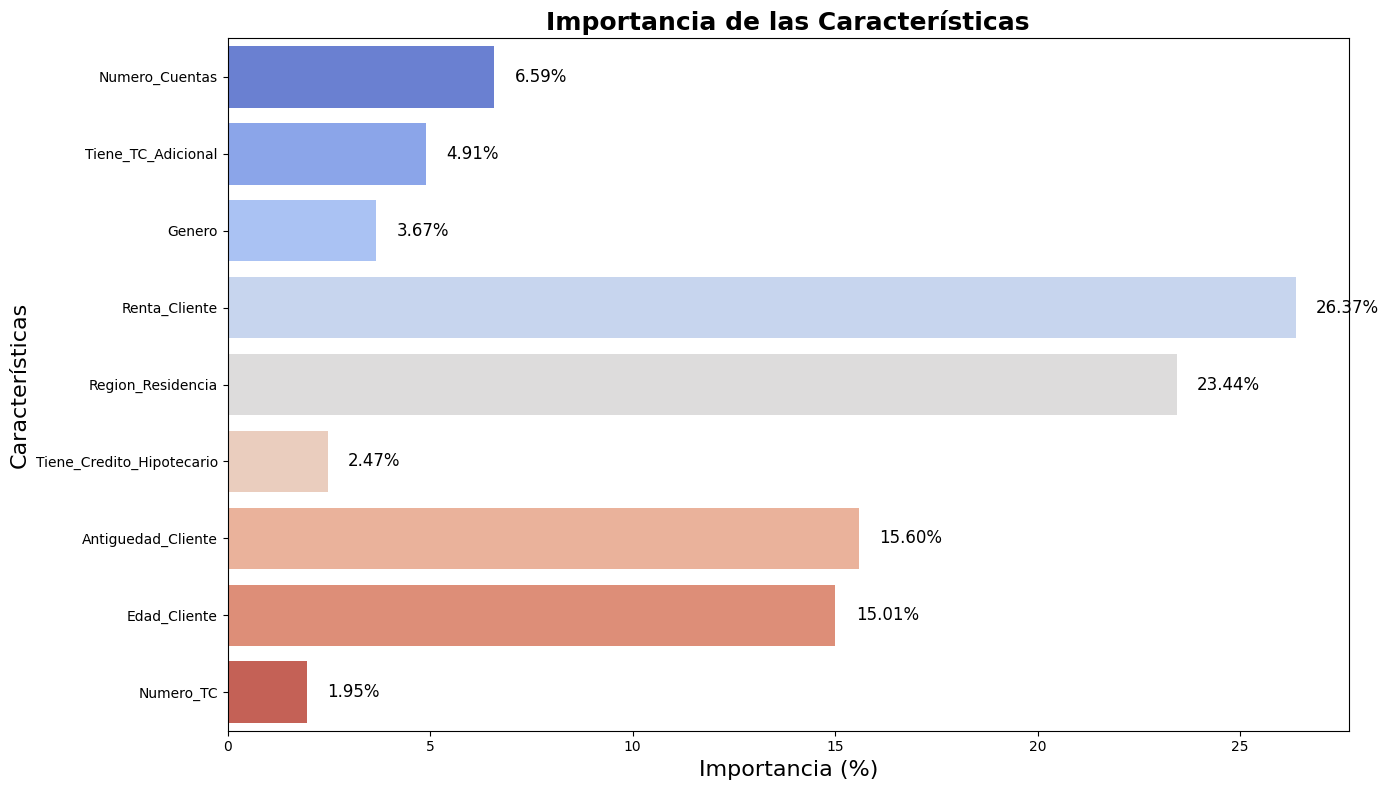

In [78]:

# Ordenar los datos de forma descendente por 'Importancia (%)'
feature_importance_sorted = feature_importance.sort_values(by='Importancia (%)', ascending=False)

# Convertir la columna 'Importancia (%)' a float para agregar etiquetas correctamente
feature_importance_sorted['Importancia_float'] = feature_importance_sorted['Importancia (%)'].str.rstrip('%').astype('float')

# Gráfico de barras
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    x='Importancia_float', 
    y='Característica', 
    data=feature_importance_sorted, 
    palette='coolwarm',  # Cambiar a una paleta más contrastante
    hue='Característica',  # Asignar la característica al hue para evitar la advertencia
    dodge=False,
    legend=False
)

# Agregar etiquetas en cada barra
for index, value in enumerate(feature_importance_sorted['Importancia_float']):
    plt.text(value + 0.5, index, f"{value:.2f}%", color='black', va='center', fontsize=12)

# Ajustar el título y etiquetas
plt.title('Importancia de las Características', fontsize=18, fontweight='bold')
plt.xlabel('Importancia (%)', fontsize=16)
plt.ylabel('Características', fontsize=16)

plt.tight_layout()
plt.show()

# 📊 **Conclusión**

## 1. **Modelo de Clasificación**
- Para la tarea de clasificación, **Random Forest** es claramente el modelo con mejor desempeño, mostrando una alta precisión y capacidad de generalización. 

## 2. **Modelo de Regresión**
- En la tarea de regresión, el **Random Forest Regressor** también se destaca, con los mejores resultados en todas las métricas de error y capacidad explicativa. Estos resultados se mantienen sobre los otros modelos probados aún después de el proceso de pruebas mediante ajuste de Hiperparámetros usados para reducir el riesgo de overfitting. Aunque el R² ha disminuido con el ajuste de hiperparámetros, el modelo ajustado sigue logrando una precisión adecuada en el conjunto de prueba y muestra resultados consistentes en la validación cruzada. Sin embargo, si el riesgo de overfitting sigue causando preocupación, el segundo mejor candidato sería el modelo de **Gradient Boosting Regressor**, que se desempeña mejor que los modelos lineales pero con menor precisión que Random Forest, por tanto, es un modelo robusto bastante eficaz que captura mejor los patrones de regresión lineal que **Ridge Regression** y **Linear Regression**.